In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jax
import jax.numpy as jnp
from jax import random
import time

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

# collocation
import sys
import os
p_ = os.path.abspath(os.path.join('..', '00_utils'))
if p_ not in sys.path:
    sys.path.append(p_)
    
p_ = os.path.abspath(os.path.join('..', '00_models'))
if p_ not in sys.path:
    sys.path.append(p_)
    
p_ = os.path.abspath(os.path.join('..', '00_utils_training'))
if p_ not in sys.path:
    sys.path.append(p_)

import preprocess # helper preprocessing class

# pyomo
import importlib
import nn_jax_diffrax

In [131]:
import run_train_diffrax_rl
importlib.reload(run_train_diffrax_rl)
Trainer = run_train_diffrax_rl.Trainer

In [132]:
def default_data_params(start_date):
    print("Generating default parameters for data")
    params_data = {'file_path': '../00_data/df_train.csv', 'start_date': start_date, 
            'n_points': 400, 'split': 200, 'n_days': 1, 'm': 1, 
            'prev_hour': True, 'prev_week': True, 'prev_year': True,
            'spacing': 'uniform',
            'encoding': {'settlement_date': 't', 'temperature': 'var1', 'hour': 'var2', 'nd': 'y'}}
    return params_data

def default_model_params():
    print("Generating default parameters for model")
    params_model = {'layer_sizes': [8, 64, 64, 1], 'penalty': 1e-5, 'learning_rate': 1e-3, 'num_epochs': [2000, 5000], 'pretrain': [0.2, 1]}
    return params_model

In [133]:
params_results = {'plot': True}
params_data = default_data_params('2015-01-10')
params_model = default_model_params()

Generating default parameters for data
Generating default parameters for model


In [134]:
params_model

{'layer_sizes': [8, 64, 64, 1],
 'penalty': 1e-05,
 'learning_rate': 0.001,
 'num_epochs': 5000,
 'pretrain': [0.2, 1]}

In [135]:
trainer = Trainer(params_results, params_data, params_model)
trainer.clear_directory()

[0.2, 1]
5000


In [136]:
trainer.train()

Epoch 100, Loss: 0.7657490259052012
Epoch 200, Loss: 0.6780676207844385
Epoch 300, Loss: 0.6187389672923481
Epoch 400, Loss: 0.5652897123849738
Epoch 500, Loss: 0.48296948732474404
Epoch 600, Loss: 0.41943948571768624
Epoch 700, Loss: 0.36140243600478644
Epoch 800, Loss: 0.31395469218595695
Epoch 900, Loss: 0.27448883456436013
Epoch 1000, Loss: 0.23964573474974074
Epoch 1100, Loss: 0.2073450746804109
Epoch 1200, Loss: 0.18676922895402995
Epoch 1300, Loss: 0.1623056435558267
Epoch 1400, Loss: 0.14839694794137465
Epoch 1500, Loss: 0.13316049576832534
Epoch 1600, Loss: 0.12357661947206826
Epoch 1700, Loss: 0.11741076511757033
Epoch 1800, Loss: 0.10913629016125778
Epoch 1900, Loss: 0.09846492775092644
Epoch 2000, Loss: 0.10278799999379049
Epoch 2100, Loss: 0.08658595592690314
Epoch 2200, Loss: 0.08468426755590563
Epoch 2300, Loss: 0.08101774516749989
Epoch 2400, Loss: 0.0742890599860445
Epoch 2500, Loss: 0.07314280088429004
Epoch 2600, Loss: 0.07251132717022708
Epoch 2700, Loss: 0.07163536

In [112]:
importlib.reload(nn_jax_diffrax)
NeuralODE_JAX = nn_jax_diffrax.NeuralODE

importlib.reload(preprocess)
DataPreprocessor = preprocess.DataPreprocessor

# , 'temperature': 'var1'
file_path = '../00_data/df_train.csv'
encoding = {'settlement_date': 't', 'temperature': 'var1', 'hour': 'var2', 'nd': 'y'}

layer_widths = [6, 64, 64, 1]
learning_rate = 1e-3
rng = random.PRNGKey(42)

from datetime import datetime, timedelta

# prepare data ranges
START_DATE = '2015-01-10'
start_date = datetime.strptime(START_DATE, '%Y-%m-%d')
date_sequences = [start_date + timedelta(days=i*5) for i in range(1)]
date_sequences_str = [date.strftime('%Y-%m-%d') for date in date_sequences]
print(date_sequences_str)

times_elapsed = []

['2015-01-10']


Epoch 100, Loss: 0.7657595024320379
Epoch 200, Loss: 0.6741057240374562
Epoch 300, Loss: 0.629605885961062
Epoch 400, Loss: 0.6117929207461393
Epoch 500, Loss: 0.5717833330007154
Epoch 600, Loss: 0.5304561233437376
Epoch 700, Loss: 0.5007611328915018
Epoch 800, Loss: 0.445752079278014
Epoch 900, Loss: 0.4307844562433161
Epoch 1000, Loss: 0.35046015715962925
Epoch 1100, Loss: 0.31928023200177225
Epoch 1200, Loss: 0.2871925970306129
Epoch 1300, Loss: 0.2506676484040012
Epoch 1400, Loss: 0.27511198494219335
Epoch 1500, Loss: 0.21400965318880832
Epoch 1600, Loss: 0.19037830589794794
Epoch 1700, Loss: 0.17773425074975518
Epoch 1800, Loss: 0.16910901403270778
Epoch 1900, Loss: 0.17215053476305084
Epoch 2000, Loss: 0.148506586876054
Epoch 2100, Loss: 0.14051265016485248
Epoch 2200, Loss: 0.1455677152656755
Epoch 2300, Loss: 0.13360278089452032
Epoch 2400, Loss: 0.12553873417336858
Epoch 2500, Loss: 0.1205935111093596
Epoch 2600, Loss: 0.11641565999361973
Epoch 2700, Loss: 0.11879651419566926


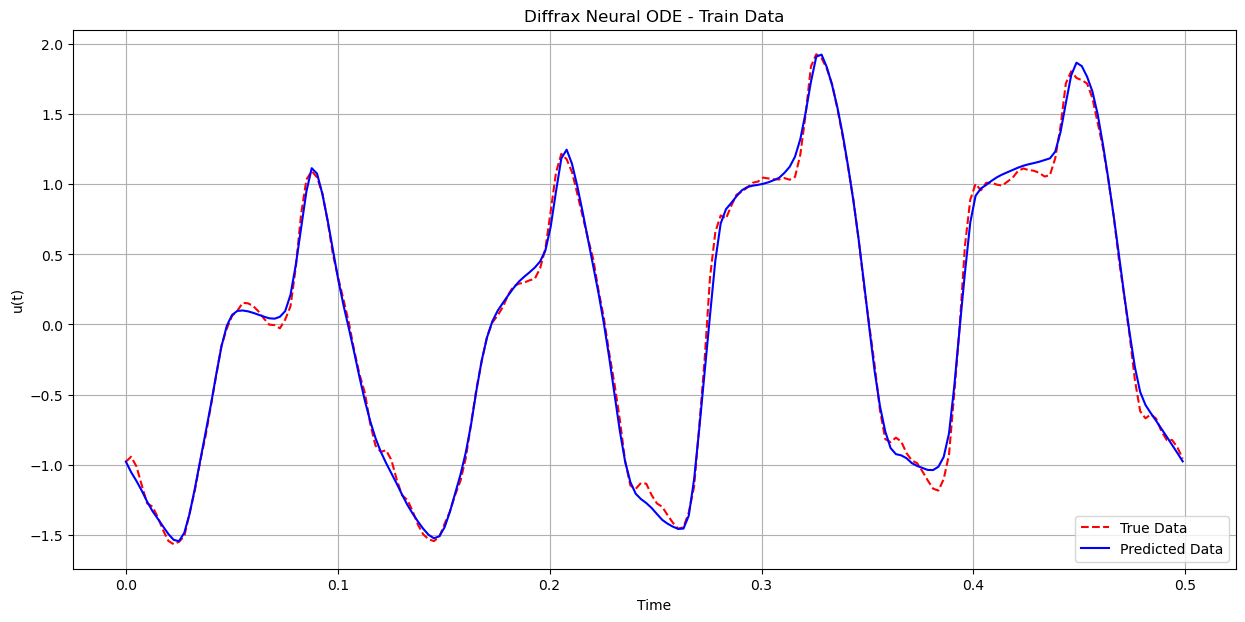

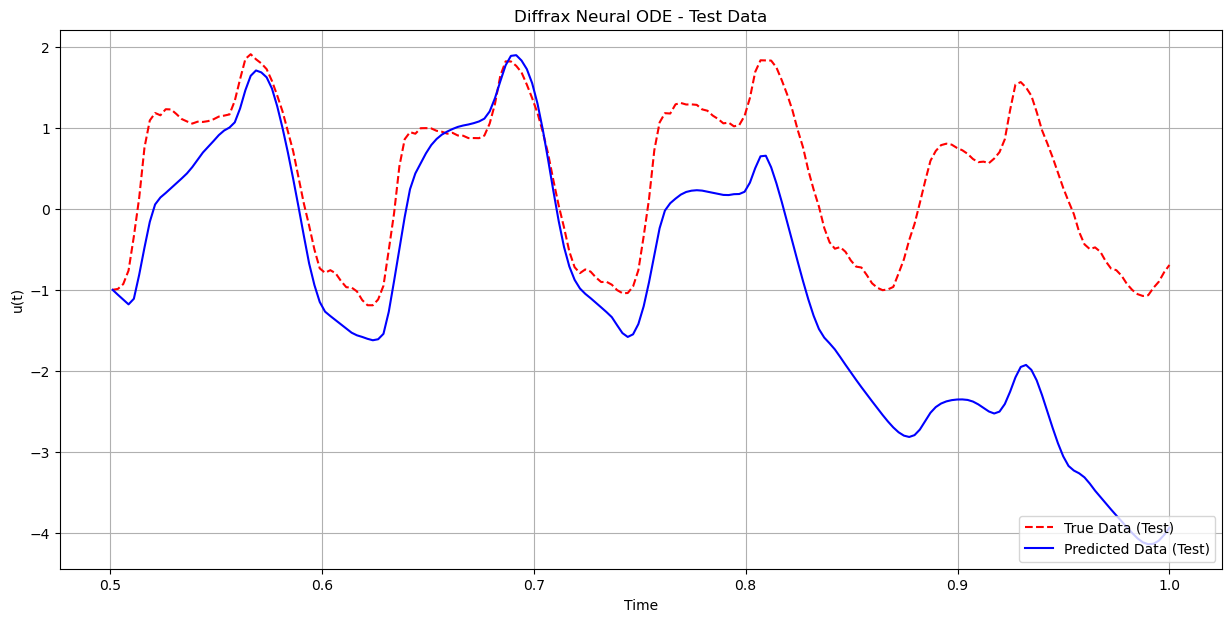

In [113]:
experiment_results = {}

for START_DATE in date_sequences_str:
    data_loader = DataPreprocessor(file_path, start_date = START_DATE, number_of_points = 400, n_days = 1, m = 0, 
                                   feature_encoding = encoding, split = 200, spacing = None, 
                                   prev_hour = True, prev_week = True, prev_year = False,
                                   smooth = False, num_nodes_mult = 1)
    
    data_subsample = data_loader.load_data()
    df_train, df_test = data_loader.preprocess_data(data_subsample)

    node_model = NeuralODE_JAX(layer_widths, time_invariant=True)
    state = node_model.create_train_state(rng, learning_rate)

    ys = jnp.atleast_2d(jnp.array(df_train['y'])).T
    ts = jnp.array(df_train['t'])
    Xs = jnp.array(df_train.drop(columns=['y', 't']))
    extra_args = (Xs, ts)
    y0 = jnp.array(ys[0])

    start_time = time.time()
    state, losses = node_model.train(state, ts[:] 
                            , ys[:], y0
                            , num_epochs = 20000
                            , extra_args = extra_args[:]
                            )
    end_time = time.time()
    
    y_train_pred = node_model.neural_ode(state.params, y0, ts, state, extra_args)
    
    experiment_results[START_DATE] = {}
    experiment_results[START_DATE]['times_elapsed'] = end_time - start_time
    
    experiment_results[START_DATE]['mae_diffrax'] = np.mean(np.abs(np.squeeze(y_train_pred) - np.squeeze(ys)))
    experiment_results[START_DATE]['mse_diffrax'] = np.mean(np.square(np.squeeze(y_train_pred) - np.squeeze(ys)))
    # -------------------------------------------- DIFFRAX NODE PREDICTION (TRAIN) --------------------
    plt.figure(figsize=(15, 7))
    plt.plot(ts, ys, 'r--', label='True Data')  
    plt.plot(ts, np.squeeze(y_train_pred), 'b' ,label='Predicted Data') 
    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.title(f"Diffrax Neural ODE - Train Data")
    plt.legend(loc ="lower right")
    plt.grid(True)
    #plt.savefig(f'../00_plots/diffrax/diffrax_solver_train_{START_DATE}.png', format='png')  
    plt.plot() 

    # -------------------------------------------- DIFFRAX NODE PREDICTION (TEST) --------------------
    ys_test = jnp.atleast_2d(jnp.array(df_test['y'])).T
    ts_test = jnp.array(df_test['t'])
    Xs_test = jnp.array(df_test.drop(columns=['y', 't']))
    extra_args_test = (Xs_test, ts_test)
    y0_test = jnp.array(ys_test[0])
    
    y_test_pred = node_model.neural_ode(state.params, y0_test, ts_test, state, extra_args_test)
    
    experiment_results[START_DATE]['mae_diffrax_test'] = np.mean(np.abs(np.squeeze(y_test_pred) - np.squeeze(ys_test)))
    experiment_results[START_DATE]['mse_diffrax_test'] = np.mean(np.square(np.squeeze(y_test_pred) - np.squeeze(ys_test)))
    
    plt.figure(figsize=(15, 7))
    plt.plot(ts_test, ys_test, 'r--', label='True Data (Test)')  
    plt.plot(ts_test, np.squeeze(y_test_pred), 'b' ,label='Predicted Data (Test)') 
    plt.xlabel('Time')
    plt.ylabel('u(t)')
    plt.title(f"Diffrax Neural ODE - Test Data")
    plt.legend(loc ="lower right")
    plt.grid(True)
    #plt.savefig(f'../00_plots/diffrax/diffrax_solver_test_{START_DATE}.png', format='png')  
    plt.plot() 